# Задача 1
Найти все корни системы уравнений\
$
 \begin{cases}
   x^2 + y^2 = 1, \\
   y = \tg x
 \end{cases}
$\
с точностью $10^{-6}$

## 1. Локализация корней
Локализацию будем проводить графическим методом.\
корень 1: $x_1 \in [0,6; 0,7], y_1 \in [0,7; 0,8]$\
корень 2: $x_2 \in [-0,7; -0,6], y_2 \in [-0,8; -0,7]$\
Заметим, что есть симметрия относительно начала координат, значит, если $(x_0; y_0)$ - корень системы, то $(-x_0; -y_0)$ - тоже корень системы

Text(0, 0.5, 'y')

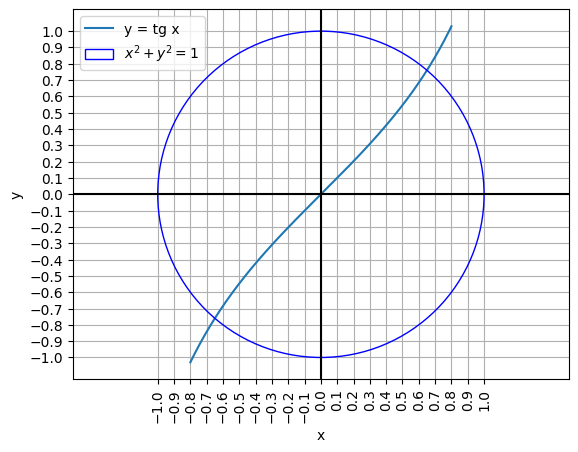

In [34]:
import numpy as np
import matplotlib.pyplot as plt


x_graph = np.linspace(-0.8, 0.8, 1000)
y_graph = np.tan(x_graph)

plt.plot(x_graph, y_graph, label="y = tg x")
c=plt.Circle ((0, 0), radius= 1 , color='blue', fill=False, zorder=2, label=r"$x^2 + y^2 = 1$")
plt.gca ().add_artist(c)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axis("equal")
plt.xticks(np.arange(-1, 1.1, 0.1), rotation=90)
plt.yticks(np.arange(-1, 1.1, 0.1))
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")


## 2. Уточнение корней

Ищем корень 1: $x_1 \in [0,6; 0,7], y_1 \in [0,7; 0,8]$\ методом простой итерации\
Система имеет вид: 
$
 \begin{cases}
   x^2 + y^2 - 1 = 0, \\
   y - \tg x = 0
 \end{cases}
$\
Для отыскания корня в I четверти она равносильна системе
$
 \begin{cases}
    x = \arctg y = \varphi_1(x, y)\\
    y = \sqrt{1 - x^2} = \varphi_2(x, y)
 \end{cases}
$\
Матрица Якоби имеет вид: 
$J = 
  \begin{pmatrix}
    0                          & \dfrac{1}{1 + y^2}\\
    \dfrac{-x}{\sqrt{1 - x^2}} & 0
  \end{pmatrix}
$\
На отрезке локализации норма матрицы меньше 1: $||J||_1 < 1$, поэтому метод простой итерации сходится


In [35]:
from math import sqrt, atan

In [36]:
def rho(u0, u1):
    # u0 и u1 - двумерные векторы
    return sqrt((u0[0] - u1[0]) ** 2 + (u0[1] - u1[1]) ** 2)

def phi(u):
    # u - двумерный вектор
    x = atan(u[1])
    y = sqrt(1 - u[0] ** 2)
    return (x, y)

In [44]:
eps = 10 ** (-6)
u0 = (0.7, 0.8)
u1 = phi(u0)
i = 1
while rho(u0, u1) > eps:
    # print(f"{i}. u0 = {u0}, u1 = {u1}, pho = {rho(u0, u1)}")
    u0 = u1
    u1 = phi(u0)
    i += 1
print(f"{i}. u0 = {u0}, u1 = {u1}, pho = {rho(u0, u1)}")
print(f"Корень: (x, y) = {u1}")


38. u0 = (0.6498893631467799, 0.7600284425937551), u1 = (0.6498884781923959, 0.7600288255511581), pho = 9.642617042448285e-07
Корень: (x, y) = (0.6498884781923959, 0.7600288255511581)


## Ответ
Корни системы: $(x, y) = (\pm 0.6498884781923959, \pm 0.7600288255511581)$